In [1]:
# NOTEBOOK FOR TESTING GUNNERUS 3 DOF MANEUVERING MODEL
import matplotlib.pyplot as plt
import numpy as np

from simulator.gunnerus import GunnerusManeuvering3DoF
plt.style.use('seaborn-whitegrid')

C:\Users\j-ehy\AppData\Local\Temp\ipykernel_19100\2597218059.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
dt = 0.1                                # Timestep
simtime = 600                           # Simulation time: 10 minutes
t = np.arange(0, simtime, dt)           # time - array

vessel_model = GunnerusManeuvering3DoF(dt=0.1)

eta = np.zeros((len(t), 3))
nu = np.zeros((len(t), 3))
x = np.zeros((len(t), 6))

# Current speed and direction
Uc = 0.5                 # knots
beta_c = np.deg2rad(135) # Current going to south east

tau = np.zeros(3)       # No controll loads

for i in range(1, len(t)):
    _ = vessel_model.x_dot(Uc, beta_c, tau)
    vessel_model.integrate()
    eta[i] = vessel_model.get_eta()
    nu[i] = vessel_model.get_nu()
    x[i] = vessel_model._x

def plot_results():
    x[:, 2] = np.rad2deg(x[:, 2])
    x[:, 5] = np.rad2deg(x[:, 5])

    colors = ['blue', 'blue', 'blue', 'green', 'green', 'green']
    labels = ["N", "E", r'$\psi$', 'u', 'v', 'r']
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(18, 6))
    for i in range(6):
        if i < 3:
            plt.sca(axes[0, i])
        else:
            plt.sca(axes[1, i-3])
        plt.plot(t, x[:, i], color=colors[i], label=labels[i])
        plt.legend()
        plt.xlabel("$t \; [s]$")    

    plt.show()

[0. 0. 0.]
[-1.00558281e-05  1.55980713e-04  4.06207461e-06]
[-3.01895140e-05  4.67080496e-04  1.21510433e-05]
[-6.04232278e-05  9.32444646e-04  2.42317724e-05]
[-1.00779270e-04  1.55122533e-03  4.02691791e-05]
[-1.51280063e-04  2.32258150e-03  6.02282366e-05]
[-2.11948139e-04  3.24567885e-03  8.40739775e-05]
[-0.00028281  0.00431969  0.00011177]
[-0.00036388  0.00554379  0.00014329]
[-0.00045518  0.00691717  0.00017858]
[-0.00055675  0.00843902  0.00021763]
[-0.00066859  0.01010854  0.00026038]
[-0.00079074  0.01192494  0.00030682]
[-0.00092322  0.01388741  0.0003569 ]
[-0.00106605  0.01599519  0.00041059]
[-0.00121925  0.01824748  0.00046785]
[-0.00138285  0.02064353  0.00052866]
[-0.00155687  0.02318257  0.00059297]
[-0.00174133  0.02586384  0.00066076]
[-0.00193626  0.02868659  0.00073198]
[-0.00214168  0.03165006  0.00080661]
[-0.00235761  0.03475352  0.00088462]
[-0.00258407  0.03799623  0.00096596]
[-0.0028211   0.04137746  0.0010506 ]
[-0.00306871  0.04489649  0.00113852]
[-0.0

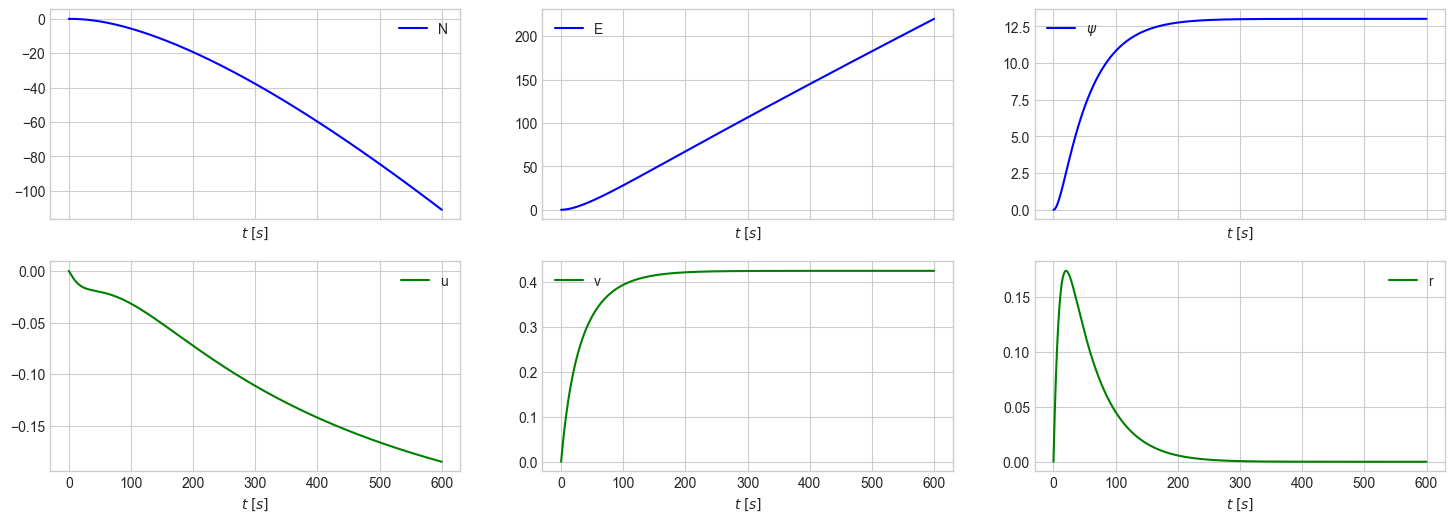

In [3]:
plot_results()

In [16]:
vessel_model.reset()

In [17]:
# Test with input from thrusters - forward thrust only

tau = np.zeros(3)
x = np.zeros((len(t), 6))
tau[0] = 1e4

for i in range(1, len(t)):
    vessel_model.x_dot(0, 0, tau)
    vessel_model.integrate()
    x[i] = vessel_model._x

[0. 0. 0.]
[0.00000000e+00 1.42492289e-04 1.49175831e-06]
[-1.76302398e-10  4.27020028e-04  4.46514633e-06]
[-8.43196668e-10  8.53126478e-04  8.91004329e-06]
[-2.45063451e-09  1.42035501e-03  1.48163369e-05]
[-5.58191926e-09  2.12824912e-03  2.21739242e-05]
[-1.09514096e-08  2.97635244e-03  3.09727121e-05]
[-1.94022381e-08  3.96420875e-03  4.12026181e-05]
[-3.19040441e-08  5.09136200e-03  5.28535709e-05]
[-4.95507218e-08  6.35735630e-03  6.59155114e-05]
[-7.35581834e-08  7.76173598e-03  8.03783929e-05]
[-1.05262137e-07  9.30404554e-03  9.62321821e-05]
[-1.46115882e-07  1.09838297e-02  1.13466859e-04]
[-1.97688115e-07  1.28006334e-02  1.32072420e-04]
[-2.61660756e-07  1.47540019e-02  1.52038874e-04]
[-3.39826791e-07  1.68434805e-02  1.73356247e-04]
[-4.34088125e-07  1.90686150e-02  1.96014583e-04]
[-5.46453457e-07  2.14289513e-02  2.20003939e-04]
[-6.79036167e-07  2.39240358e-02  2.45314394e-04]
[-8.34052221e-07  2.65534149e-02  2.71936042e-04]
[-1.01381809e-06  2.93166355e-02  2.998589

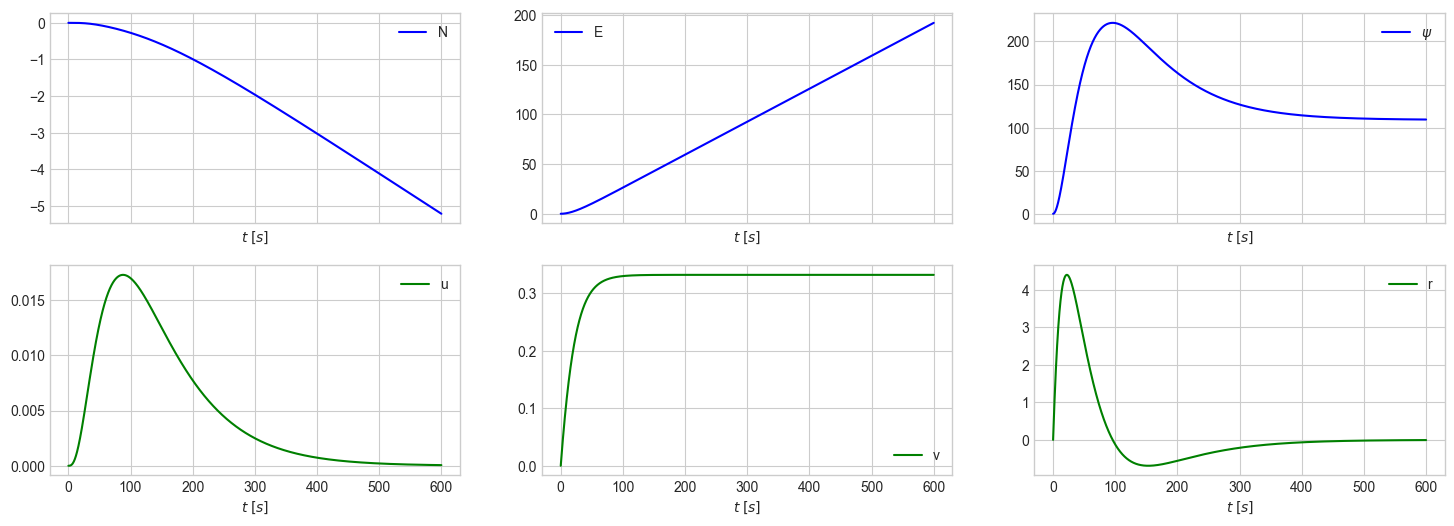

In [19]:
plot_results()